In [54]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import io

In [56]:
s3_client = boto3.client('s3')
rekognition_client = boto3.client('rekognition')

In [58]:
bucket_name = "imagerepository-25-sept-2024"
image_path = "./people.jpeg"
s3_object_name = "people.jpeg"

In [60]:
#upload image to s3 bucket
s3_client.upload_file(image_path, bucket_name, s3_object_name)
print("Uploaded file to bucket!")

Uploaded file to bucket!


In [66]:
# call Rekognition to detect labels in the uploaded image
response = rekognition_client.detect_labels(
    Image={
        'S3Object': {
            'Bucket': bucket_name,
            'Name': s3_object_name
        }
    },
    MaxLabels=10,  # Maximum number of labels to return
    MinConfidence=75  # Minimum confidence level for the labels
)

# Print all detected labels and their instances
for label in response['Labels']:
    print(f"Label: {label['Name']}, Confidence: {label['Confidence']:.2f}%")
    if 'Instances' in label and label['Instances']:
        for instance in label['Instances']:
            box = instance['BoundingBox']
            print(f"  - Instance BoundingBox: {box}")
    else:
        print(f"  - No instances found for this label.")

Label: Flower, Confidence: 100.00%
  - No instances found for this label.
Label: Flower Arrangement, Confidence: 100.00%
  - No instances found for this label.
Label: Flower Bouquet, Confidence: 100.00%
  - No instances found for this label.
Label: Adult, Confidence: 99.41%
  - Instance BoundingBox: {'Width': 0.15211793780326843, 'Height': 0.7710925340652466, 'Left': 0.0008310030098073184, 'Top': 0.0}
  - Instance BoundingBox: {'Width': 0.25250688195228577, 'Height': 0.5327221751213074, 'Left': 0.28361186385154724, 'Top': 0.36984172463417053}
  - Instance BoundingBox: {'Width': 0.11453921347856522, 'Height': 0.6758305430412292, 'Left': 0.4887102246284485, 'Top': 0.004050417337566614}
  - Instance BoundingBox: {'Width': 0.10850731283426285, 'Height': 0.5529624819755554, 'Left': 0.3871253430843353, 'Top': 0.03862123563885689}
Label: Female, Confidence: 99.41%
  - Instance BoundingBox: {'Width': 0.15211793780326843, 'Height': 0.7710925340652466, 'Left': 0.0008310030098073184, 'Top': 0.0}


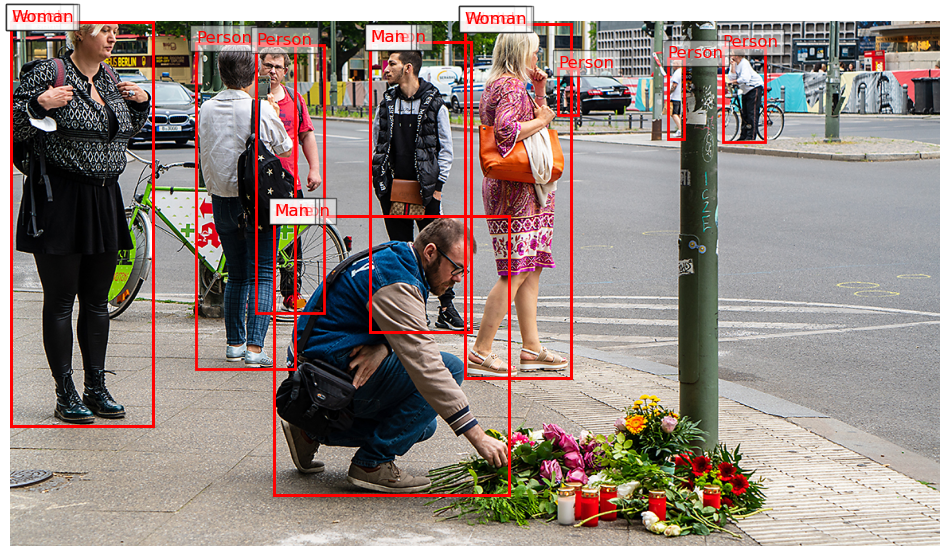

In [64]:
# Get the image from S3 to draw on it
s3 = boto3.client('s3')
image_obj = s3.get_object(Bucket=bucket_name, Key=s3_object_name)
image_data = image_obj['Body'].read()
image = Image.open(io.BytesIO(image_data))

# Create a figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Process the detected labels and draw bounding boxes for each object
for label in response['Labels']:
    # Check if instances are available for the label
    if 'Instances' in label and label['Instances']:
        for instance in label['Instances']:
            box = instance['BoundingBox']
            # Calculate the bounding box coordinates
            left = box['Left'] * image.width
            top = box['Top'] * image.height
            width = box['Width'] * image.width
            height = box['Height'] * image.height
            
            # Create a Rectangle patch
            rect = patches.Rectangle((left, top), width, height, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            # Annotate the label
            ax.text(left, top, label['Name'], color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show the image with bounding boxes and labels
plt.axis('off')  # Hide the axes
plt.show()